In [13]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split

Import libraries

In [14]:
new_data = np.load('nodule_images_updated_3.npy')
new_data_label = np.load('malignancy_scores_updated_3.npy')

Load image data from the numpy arrays

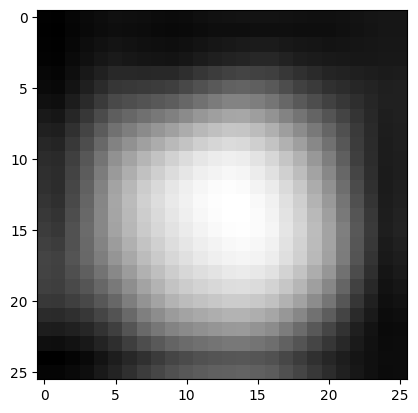

In [15]:
nodule = new_data[6, :, :]
nodule = np.reshape(nodule, (26,26))
from matplotlib import pyplot as plt
plt.imshow(nodule, cmap='gray')
plt.show()

Visualise a nodule by changing the number in the nodule function

In [16]:
new_data = new_data.reshape(new_data.shape[0], 26, 26, 1)
converted_array = np.where(new_data_label == 1, 0, 1)

Reshape the image data so that the colour channel is included in the arrays.
The images are in greyscale so therefore only one colour channel is used.

In [17]:
newTrain, newTest, newLabelTrain, newLabelTest = train_test_split(new_data, converted_array, test_size=0.2)

Split data into training and testing sets

In [18]:
model = Sequential()

model.add(Conv2D(32, (3,3), strides=1, activation = 'relu', input_shape=(26,26,1))) 
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(synchronized=True))

model.add(Flatten())
model.add(Dense (64, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation = 'sigmoid'))

Model Building

In [19]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

Add optimiser parameter (using Adam optimsier)

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 12, 12, 32)        128       
 chNormalization)                                                
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                294976    
                                                                 
 dropout_1 (Dropout)         (None, 64)               

Summary of model that has been built

In [21]:
hist = model.fit(newTrain, newLabelTrain, epochs = 25, validation_data = (newTest,newLabelTest), batch_size=32)

Epoch 1/25


88/88 [==============================] - 2s 14ms/step - loss: 0.4810 - accuracy: 0.7595 - val_loss: 0.7992 - val_accuracy: 0.5243
Epoch 2/25
88/88 [==============================] - 1s 11ms/step - loss: 0.3873 - accuracy: 0.8352 - val_loss: 0.7636 - val_accuracy: 0.5329
Epoch 3/25
88/88 [==============================] - 1s 10ms/step - loss: 0.3621 - accuracy: 0.8438 - val_loss: 0.6113 - val_accuracy: 0.6357
Epoch 4/25
88/88 [==============================] - 1s 11ms/step - loss: 0.3595 - accuracy: 0.8452 - val_loss: 0.5593 - val_accuracy: 0.6571
Epoch 5/25
88/88 [==============================] - 1s 10ms/step - loss: 0.3248 - accuracy: 0.8610 - val_loss: 0.5288 - val_accuracy: 0.6671
Epoch 6/25
88/88 [==============================] - 1s 11ms/step - loss: 0.3055 - accuracy: 0.8660 - val_loss: 0.4189 - val_accuracy: 0.8500
Epoch 7/25
88/88 [==============================] - 1s 10ms/step - loss: 0.2992 - accuracy: 0.8742 - val_loss: 0.6777 - val_accuracy: 0.6671
Epoch 8/25
88/88 [======

Fitting the model using the validation data

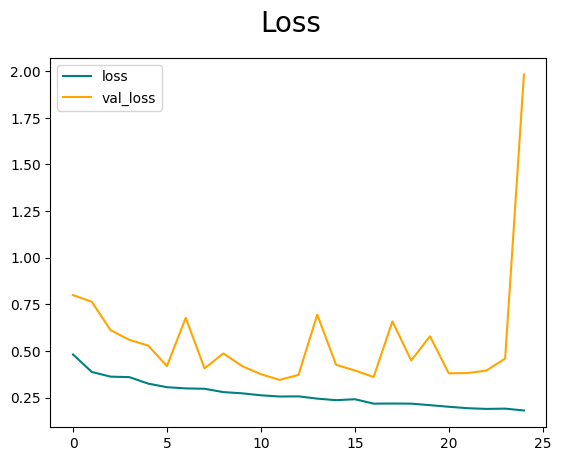

In [22]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle("Loss", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

Plotting the loss function and validation loss of the model

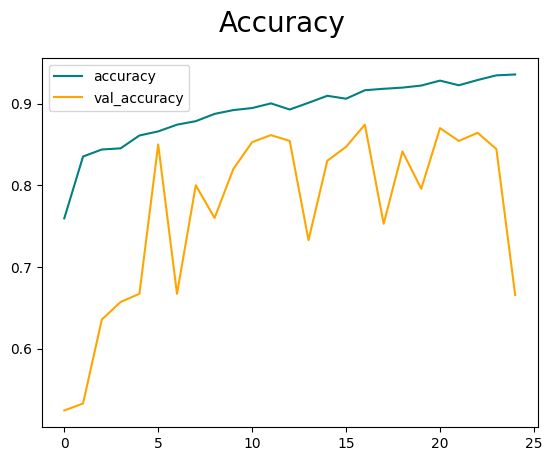

In [23]:
fig2 = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig2.suptitle("Accuracy", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

Plotting the accuracy and validation accuracy of the model

In [24]:
pred = model.predict(newTest)
pred = np.around(pred)

from sklearn.metrics import confusion_matrix

confusion_matrix(newLabelTest, pred)

22/22 [==============================] - 0s 2ms/step


array([[101, 232],
       [  2, 365]])